### import all required packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
data=pd.read_csv('D:\sai\st\ml_task2\Mall_Customers.csv')

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Explore

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
numeric_columns=data.select_dtypes(include=[np.number]).columns
non_numeric_columns=data.select_dtypes(exclude=[np.number]).columns
data[numeric_columns]=data[numeric_columns].fillna(data[numeric_columns].mean())


In [11]:
label_encoder=LabelEncoder()
for column in non_numeric_columns:
    data[column]=label_encoder.fit_transform(data[column].astype(str))
print(data.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [12]:
mask=data['Spending Score (1-100)']>50
data_score=data[mask]
data_score.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,1,21,15,81
3,4,0,23,16,77
5,6,0,22,17,76
7,8,0,23,18,94
9,10,0,30,19,72


In [13]:
data_score.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,100.298969,0.453608,34.597938,60.412371,71.670103
std,59.122783,0.500429,13.024544,26.756133,14.710910
min,2.000000,0.000000,18.000000,15.000000,51.000000
25%,51.000000,0.000000,26.000000,42.000000,57.000000
50%,96.000000,0.000000,31.000000,60.000000,73.000000
75%,152.000000,1.000000,38.000000,78.000000,85.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [15]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X=data[features]
# scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


##### Split

In [44]:
X=data.iloc[:,[2,4]]
print(f"x shape {X.shape}")
X.head() 

x shape (200, 2)


,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [21]:
sse=[]
for k in range(1,11):
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

##### Elbow Plot

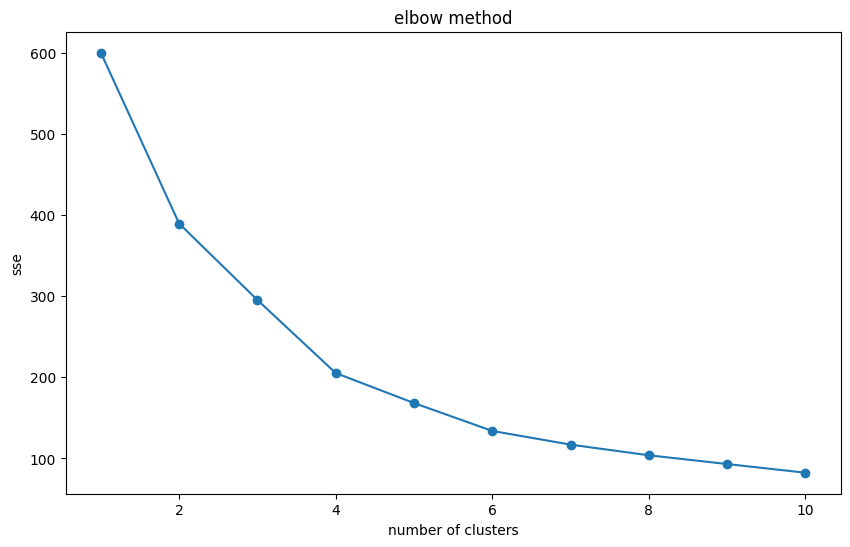

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),sse,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.title('elbow method')
plt.show()


In [23]:

from sklearn.metrics import silhouette_score

silhouette_scores= []  # Rename the list to avoid conflict

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Fit the model to the scaled data
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)  # Compute silhouette score
    silhouette_scores.append(score)


##### Silhouette Score Plot

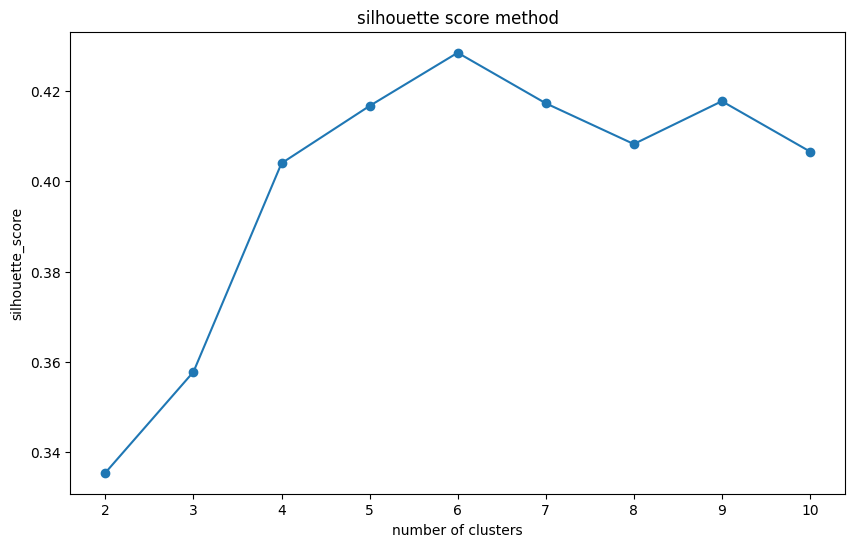

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(2,11),silhouette_scores,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')
plt.title('silhouette score method')
plt.show()

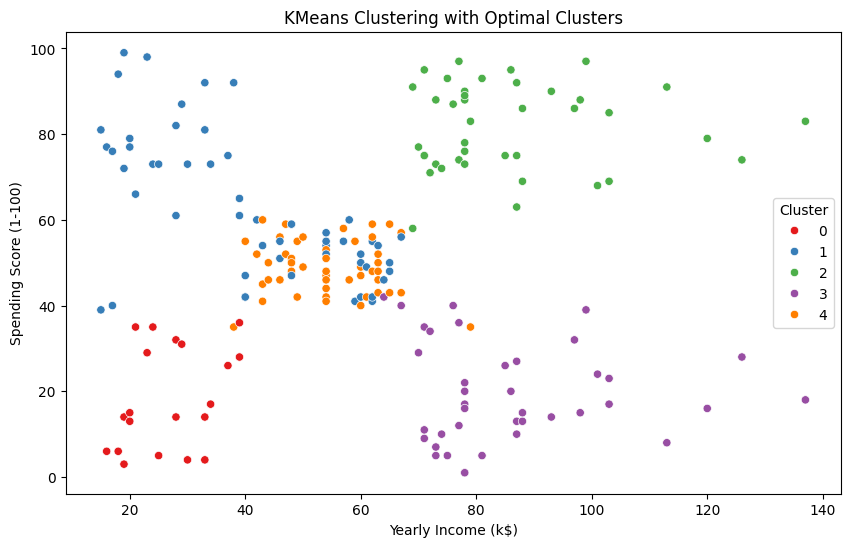

In [25]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x ='Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster', palette='Set1')
plt.title('KMeans Clustering with Optimal Clusters')
plt.xlabel('Yearly Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


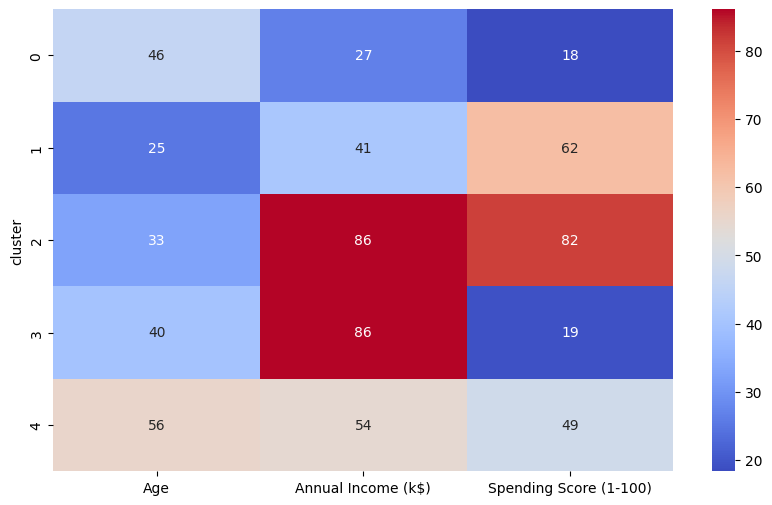

In [48]:
cluster_centers=scaler.inverse_transform(kmeans.cluster_centers_)
cluster_center_df=pd.DataFrame(cluster_centers, columns=features)
cluster_center_df['cluster']=range(optimal_k)
plt.figure(figsize=(10,6))
sns.heatmap(cluster_center_df.set_index('cluster'), annot=True, cmap='coolwarm')
plt.show()

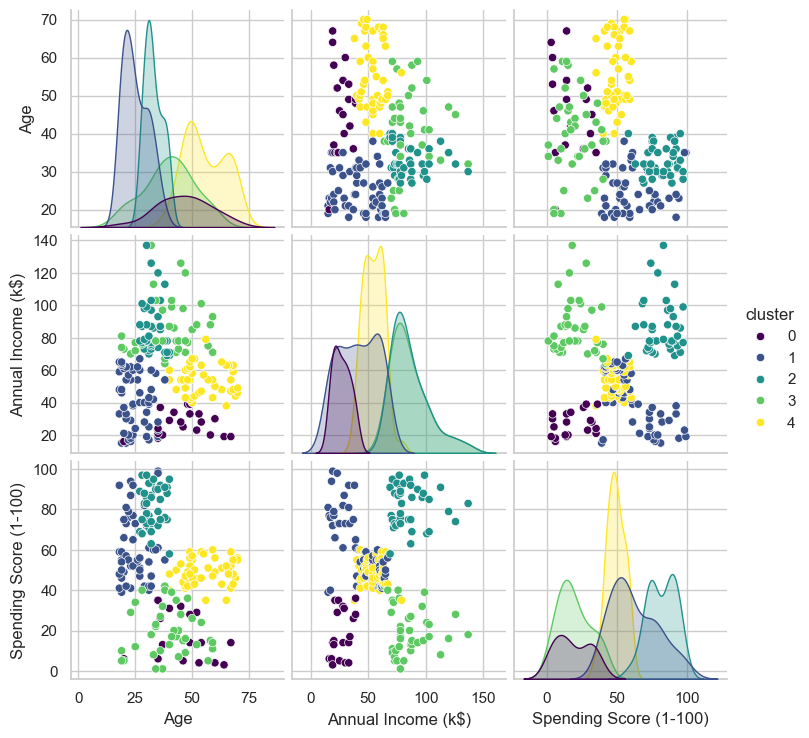

In [42]:
sns.pairplot(data,hue='cluster', palette='viridis', vars= features)
plt.show()

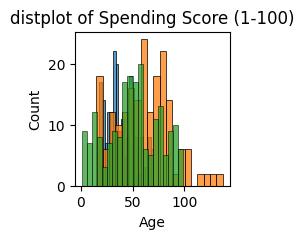

In [27]:
plt.figure(figsize=(10,6))
n=1
for X in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=1,wspace=1)
    sns.histplot(data[X],bins=20)
    plt.title('distplot of {}'.format(X))
plt.show()

Text(0.5, 1.0, 'spending score: Age Distribution')

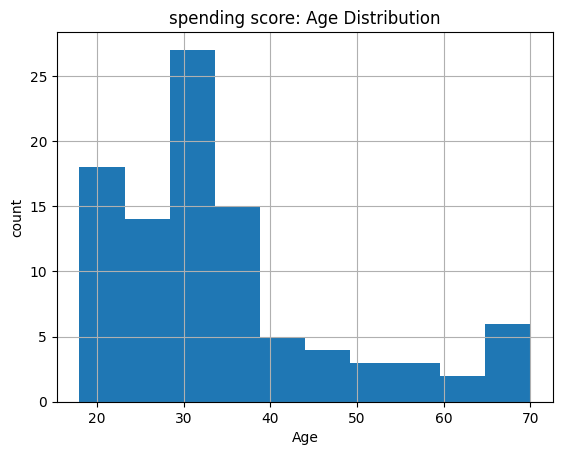

In [28]:
data_score['Age'].hist()
plt.xlabel('Age')
plt.ylabel('count')
plt.title('spending score: Age Distribution')

In [43]:
cluster_summary = data.groupby('cluster')[features].mean().reset_index()
print(cluster_summary)


   cluster        Age  Annual Income (k$)  Spending Score (1-100)
0        0  46.250000           26.750000               18.350000
1        1  25.185185           41.092593               62.240741
2        2  32.875000           86.100000               81.525000
3        3  39.871795           86.102564               19.358974
4        4  55.638298           54.382979               48.851064
